## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [69]:
import pandas as pd

import numpy as np

import random

import matplotlib.pyplot as plt

%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [70]:
# Call up the csv file from local storage and save it to 'df'
df = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\ab_data.csv')

In [71]:
# Take a look at the top few rows with 'head'(This calls up the first five rows)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


The output above shows that we have 5 columns with labels, 'user_id', 'timestamp', 'group', 'landing_page' and 'converted'.

b. Use the below cell to find the number of rows in the dataset.

In [72]:
print(df.shape)

(294478, 5)


 There are 294,478 rows in the dataset (5 represents the number of columns)

c. The number of unique users in the dataset.

In [73]:
# The number of unique users can be gotten by the user_id

df['user_id'].nunique()

290584

d. The proportion of users converted.

In [74]:
# To get the proportion of users converted, we divide the number of converted (where the column = 1) by the number of unique
# users (which we got from our previous calculation)

df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

The result above is approximately equal to 12.1% (The answer multiplied by 100%)

e. The number of times the `new_page` and `treatment` don't line up.

In [75]:
# The 'new page' is found in the 'landing page' column, while the 'treatment' is found in the 'group' column.

len(df[df['group'] == 'treatment'][df['landing_page'] == 'old_page']) + \
    len(df[df['group'] == 'control'][df['landing_page'] == 'new_page'])


C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


3893

f. Do any of the rows have missing values?

In [76]:
# To check for rows with missing values

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

 The output shows that there are no rows with missing values, hence the zeros.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [77]:
# To create a new dataset, we remove the rows that are not aligned, then concatenate (concat)
# the result and save it to df2
new_page_df = df[df['group'] == 'treatment'][df['landing_page'] == 'new_page']
old_page_df = df[df['group'] == 'control'][df['landing_page'] == 'old_page']
df2 = pd.concat([new_page_df, old_page_df])

# To check the new dataset
df2.head()


C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [78]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [79]:
# Again, we use the 'user_id' to check for unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [80]:
# First to ascertain that that a 'user_id' is repeated, we use 'count'
df2['user_id'].count()

290585

The output above 290,585 is one more than the result we got for unique users, 290,584. This shows that a user_id is repeated.

c. What is the row information for the repeat **user_id**? 

In [81]:
# To get information about the repeat user_id we use the 'duplicated' function
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In order to achieve this, we take the row number of the duplicate user_id (2893) and use the 'drop' function to remove it.
**axis = 0** means we are removing only that **row** without affecting other parts of the dataset.
To keep the dataframe as **df2**, we simply update its value by setting it to equal the new dataset after the row has been 
dropped.

In [82]:
df2 = df2.drop(2893, axis=0)


In [83]:
# To verify that the duplicate has been dropped, we use count 'function' again
df2['user_id'].count()

290584

The output **290584** indicates that the duplicate user_id has been dropped.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [84]:
# We can get the probability by calculating the mean of the 'converted'
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [85]:
# This time we find the mean of the converted in the control group
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [86]:
# Again we find the mean of the converted, this time of the treatment group
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [87]:
# This is calculated by dividing the number of 'new_page' occurences (defined as the length 'len' in Python) by the total number
# of 'landing_page' occurences
len(df2[df2['landing_page'] == 'new_page']) / len(df2['landing_page'])

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Well from our analysis above, the probability of an individual converting regardless of the page they received is **0.11959708724499628** or **11.95%**. 

On the other hand, the probability for conversion for those who received the 'treatment' page is **0.11880806551510564** or **11.88%**. 

The difference between the two values - **0.07%** - is so minimal that it is negligible.
In fact, the conversion rate for those who received only the treatment page appears to drop slightly.

Hence we can say that the evidence is **not** sufficient to show that conversion occurs as a result of the new_page.
To ascertain this, further tests will have to be carried out.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was made.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

For our null hypothesis, we have:
$$H_{null}: P_{old} >= P_{new}$$

While for the alternative hypothesis we have:
    $$H_{alternative}: P_{old} < P_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [88]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [89]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [90]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145310

d. What is $n_{old}$?

In [91]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [92]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [93]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_new])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [94]:
new_page_converted.mean() - old_page_converted.mean()

-0.0005804695615904826

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [95]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, 1-p_new])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  19.,  176.,  785., 1948., 3011., 2505., 1206.,  290.,   56.,
           4.]),
 array([-0.00444174, -0.00349534, -0.00254894, -0.00160254, -0.00065614,
         0.00029026,  0.00123667,  0.00218307,  0.00312947,  0.00407587,
         0.00502227]),
 <a list of 10 Patch objects>)

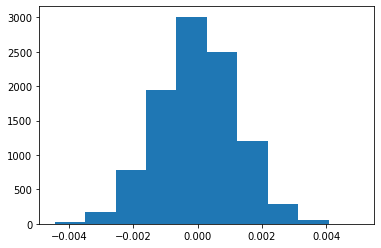

In [96]:
plt.hist(p_diffs)

It's a normal distribution, which is what I expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [97]:
#First we compute the actual difference
actual_difference = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
actual_difference

-0.0015782389853555567

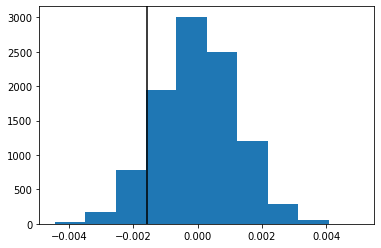

In [98]:
plt.hist(p_diffs)
plt.axvline(actual_difference, color='black')

In [99]:
# Calculating the proportion of p_diffs greater than the actual_difference outputs a result known as the p_value
p_diffs = np.array(p_diffs)
p_val = (p_diffs > actual_difference).mean()
p_val

0.8994

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

What is computed here is the proportion of the simulated difference (**pdiffs**)  between p_new and p_old that is **greater than** the actual difference (**actual_difference**)  between p_new and p_old. 

In scientific studies this is known as the **p-value**.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm

convert_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
convert_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])
n_old = len(df2[df2.landing_page == 'old_page'])
n_new = len(df2[df2.landing_page == 'new_page'])
p1_hat = convert_new / n_new
p2_hat = convert_old / n_old
p = (convert_new + convert_old) / (n_new + n_old)
z_stat = (p2_hat-p1_hat) / np.sqrt(p*(1-p)*((1/n_old)+(1/n_new)))
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)
z_stat


C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jonathan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


17489
17264
145274
145310


1.3109241984234394

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

(The link above is not loading, so I used [this](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html?highlight=proportions_ztest#statsmodels.stats.proportion.proportions_ztest).)

In [101]:
# count is the number of successes during trials
# nobs is the number of observations, which should be the same length as count

from statsmodels.stats.proportion import proportions_ztest
count = np.array([145310, 145274]) # n_new,n_old
nobs = np.array([17264,17489]) # convert_new, convert_old
value = 0.05
stat, p_val = proportions_ztest(count,nobs,value)



C:\Users\jonathan\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:846: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)
C:\Users\jonathan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jonathan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jonathan\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [102]:
from scipy.stats import norm
norm.ppf(1-value)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?


The **z-score** and **p-value** are approximately **1.31** and **0.904** respectively.The z-score is also less than the **critical value** of **1.64**. This makes a case for the null hypothesis, as there appears to be no significant changes in rate of conversion when both the old page and the new page are compared.
This agrees with our findings in parts **j** and **k**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In this case, a **binary logistic regression** is the best type of regression to perform here because it requires a binary dependent variable. A binary variable is a variable that has only two possible outcomes, in our case **conversion** and **no conversion**. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [103]:
# first, let's see what df2 looks like presently
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [104]:
# Add the intercept and ab_page columns
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [105]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [106]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:24:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

From the table above, the **p-value** associated with **ab_page** is 0.190. The value differs from what was obtained in **Part II** because it was obtained using different hypotheses.


To compare, the **null** and **alternative** hypotheses used in **Part II** and **Part III** respectively are as follows:

**Part II**

$$H_{null}: P_{old} >= P_{new}$$

 $$H_{alternative}: P_{old} < P_{new}$$

**Part III**

$$H_{null}: P_{old} = P_{new}$$

$$H_{alternative}: P_{old}  != P_{new}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Well there are some disadvantages to adding other factors into the regression model. Some of these are:
+ Incomplete data which could lead to false observations and conclusions
+ Correlation may be wrongly interpreted as causation
+ Adding more factors necessitates increasing the sample size, otherwise the result would be biased


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [125]:
# import countries dataset and merge with df2
countries_df = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\countries.csv')
countries_df.head()



,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [126]:
df_new = df2.merge(countries_df, on='user_id', how='inner')
df_new.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [127]:
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [128]:
sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']]).fit().summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:32:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [131]:
df_new['group_country'] = df_new['group'] + '_' + df_new['country']
print(df_new.shape)
df_new.head()

(290584, 12)


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,group_country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,treatment_US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,treatment_US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,treatment_CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,treatment_UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,treatment_CA


In [132]:
df_new = df_new.join(pd.get_dummies(df_new['group_country']))
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,group_country,control_CA,control_UK,control_US,treatment_CA,treatment_UK,treatment_US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,treatment_US,0,0,0,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,treatment_US,0,0,0,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,treatment_CA,0,0,0,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,treatment_UK,0,0,0,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,treatment_CA,0,0,0,1,0,0


In [133]:
sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'treatment_CA', 'treatment_UK']]).fit().summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:49:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page         -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA              -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK              -0.0057      0.019     -0.306      0.760      -0.043       0.031
treatment_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
treatment_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
================================================================================
"""

Once again, we are able to see that there is no significant changes in conversion rates while considering different interactions between page and country.

<a id='conclusions'></a>
## Conclusions

The aim of these analysis was to find out if the landing page influenced conversion. 

Our **null**  hypothesis proposed that the new landing has an equal or higher conversion rate than the old landing page. While our **alternative** hpothesis suggested that the new landing page has a lower conversion rate than the old landing page.

The **AB Test** carried out showed that the new landing page does not have a significant impact on conversion. In fact there appears to be a slight drop in conversion compared to the old landing page.

Regression analysis was also carried out and the result agreed with that of the A/B test.

Even after inputting an additional factor to the regression model, 'country', to see if the country a user lives in determines conversion, there still was no noticeable impact on conversion.

From the analysis, it can be concluded that the new landing page has no effect on conversion compared to the old landing page.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.